In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy

In [2]:
def AlexNet(X_train, y_train, **kwargs):
    
    model = Sequential([
        Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(384, 512, 3)), # L1
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L2
        Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu'), # L3
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L4
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'), # L5
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu'), # L6
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'), # L7
        MaxPooling2D(pool_size=(3,3), strides=(2,2)), # L8
        Flatten(),
        Dense(4096, activation='relu'), # L9
        Dropout(0.5),
        Dense(4096, activation='relu'), # L10
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])
    history = model.fit(X_train, y_train, **kwargs)
    return model, history

In [3]:
X, y = [], []
folder = 'new-house-resized-dataset'
folder_list = os.listdir(folder)
for file in folder_list:
    print('.',end='')
    category = file.split('_')[0]
    if category == 'recycle':
        y.append([1,0,0])
    elif category == 'trash':
        y.append([0,1,0])
    elif category == 'compost':
        y.append([0,0,1])
    else:
        raise Exception(f'Invalid Waste Catgory: {category}')
    img = Image.open(f'{folder}/{file}')
    arr = np.array(img)
    X.append(arr)

print()
print('Datapoints:', len(y))
X, y = np.array(X), np.array(y)
print('Recycle/Trash/Compost:', np.sum(y, axis=0))
print('done')

................................................................................................................................................................................................................................................................................................................................................................
Datapoints: 352
Recycle/Trash/Compost: [117 118 117]
done


In [4]:
SPLIT = 3
TEST_IDX = [271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]

def train_test_split(X, y, test_idx=None, test_size=0.2):
    ''' Split input data X and labels y into training and testing arrays '''
    n_list = list(range(len(y)))
    if test_idx is None:
        print('\n -- Performing NEW train-test split -- \n')
        test_idx = np.random.choice(n_list, replace=False, size=int(test_size*len(y)))
    else:
        test_idx = np.array(test_idx)
    train_idx = np.array([i for i in n_list if i not in test_idx])
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test, test_idx

X_train, y_train, X_test, y_test, test_idx = train_test_split(X, y, TEST_IDX)
print(list(test_idx))

[271, 318, 309, 108, 110, 70, 256, 331, 111, 224, 3, 55, 114, 117, 164, 295, 254, 149, 221, 48, 192, 316, 195, 167, 307, 66, 165, 10, 152, 265, 338, 76, 99, 201, 151, 162, 311, 169, 253, 29, 322, 32, 61, 74, 52, 157, 91, 255, 187, 136, 314, 266, 325, 269, 332, 185, 9, 351, 250, 22, 347, 172, 260, 73, 321, 133, 299, 220, 18, 98]


In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(282, 384, 512, 3) (282, 3)
(70, 384, 512, 3) (70, 3)


In [6]:
#class_weight = {0:1, 1:100}
#print(class_weight)
model, hist = AlexNet(X_train, y_train, verbose=True, epochs=500, validation_split=0.2, shuffle=True)
    # batch_size=32)
    # class_weight = class_weight)

Epoch 1/500
8/8 [==============================] - 33s 4s/step - loss: 5.5852 - accuracy: 0.4000 - val_loss: 2.3951 - val_accuracy: 0.0351
Epoch 2/500
8/8 [==============================] - 31s 4s/step - loss: 3.7778 - accuracy: 0.5067 - val_loss: 2.6786 - val_accuracy: 0.0351
Epoch 3/500
8/8 [==============================] - 33s 4s/step - loss: 3.0192 - accuracy: 0.5422 - val_loss: 0.9720 - val_accuracy: 0.5965
Epoch 4/500
8/8 [==============================] - 30s 4s/step - loss: 2.8165 - accuracy: 0.5378 - val_loss: 1.3154 - val_accuracy: 0.4561
Epoch 5/500
8/8 [==============================] - 33s 4s/step - loss: 1.4008 - accuracy: 0.6711 - val_loss: 0.4747 - val_accuracy: 0.8596
Epoch 6/500
8/8 [==============================] - 33s 4s/step - loss: 1.5359 - accuracy: 0.6578 - val_loss: 0.4930 - val_accuracy: 0.8421
Epoch 7/500
8/8 [==============================] - 30s 4s/step - loss: 1.1134 - accuracy: 0.6667 - val_loss: 0.9756 - val_accuracy: 0.7018
Epoch 8/500
8/8 [==========

8/8 [==============================] - 30s 4s/step - loss: 0.1066 - accuracy: 0.9600 - val_loss: 0.2589 - val_accuracy: 0.9474
Epoch 60/500
8/8 [==============================] - 28s 4s/step - loss: 0.0510 - accuracy: 0.9867 - val_loss: 0.2718 - val_accuracy: 0.9298
Epoch 61/500
8/8 [==============================] - 28s 4s/step - loss: 0.0486 - accuracy: 0.9778 - val_loss: 0.1990 - val_accuracy: 0.9649
Epoch 62/500
8/8 [==============================] - 28s 4s/step - loss: 0.0357 - accuracy: 0.9911 - val_loss: 0.1260 - val_accuracy: 0.9825
Epoch 63/500
8/8 [==============================] - 28s 3s/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.2261 - val_accuracy: 0.9474
Epoch 64/500
8/8 [==============================] - 28s 4s/step - loss: 0.0549 - accuracy: 0.9867 - val_loss: 0.2111 - val_accuracy: 0.9649
Epoch 65/500
8/8 [==============================] - 28s 3s/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.1716 - val_accuracy: 0.9649
Epoch 66/500
8/8 [===============

8/8 [==============================] - 28s 4s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9825
Epoch 118/500
8/8 [==============================] - 28s 4s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1931 - val_accuracy: 0.9825
Epoch 119/500
8/8 [==============================] - 27s 3s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2154 - val_accuracy: 0.9649
Epoch 120/500
8/8 [==============================] - 28s 4s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.2089 - val_accuracy: 0.9649
Epoch 121/500
8/8 [==============================] - 28s 4s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.2466 - val_accuracy: 0.9474
Epoch 122/500
8/8 [==============================] - 28s 3s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2832 - val_accuracy: 0.9474
Epoch 123/500
8/8 [==============================] - 28s 4s/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.2345 - val_accuracy: 0.9474
Epoch 124/500
8/8 [========

Epoch 175/500
8/8 [==============================] - 28s 3s/step - loss: 6.1960e-04 - accuracy: 1.0000 - val_loss: 0.2004 - val_accuracy: 0.9649
Epoch 176/500
8/8 [==============================] - 28s 4s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2013 - val_accuracy: 0.9649
Epoch 177/500
8/8 [==============================] - 28s 3s/step - loss: 8.7915e-04 - accuracy: 1.0000 - val_loss: 0.2000 - val_accuracy: 0.9649
Epoch 178/500
8/8 [==============================] - 28s 3s/step - loss: 5.7110e-04 - accuracy: 1.0000 - val_loss: 0.2035 - val_accuracy: 0.9649
Epoch 179/500
8/8 [==============================] - 27s 3s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.1630 - val_accuracy: 0.9649
Epoch 180/500
8/8 [==============================] - 27s 3s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1473 - val_accuracy: 0.9825
Epoch 181/500
8/8 [==============================] - 28s 4s/step - loss: 8.9739e-04 - accuracy: 1.0000 - val_loss: 0.1785 - val_accuracy: 0.98

Epoch 232/500
8/8 [==============================] - 28s 3s/step - loss: 4.9236e-04 - accuracy: 1.0000 - val_loss: 0.2032 - val_accuracy: 0.9649
Epoch 233/500
8/8 [==============================] - 27s 3s/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2384 - val_accuracy: 0.9649
Epoch 234/500
8/8 [==============================] - 28s 4s/step - loss: 0.0078 - accuracy: 0.9956 - val_loss: 0.1433 - val_accuracy: 0.9825
Epoch 235/500
8/8 [==============================] - 28s 4s/step - loss: 0.0113 - accuracy: 0.9956 - val_loss: 0.2094 - val_accuracy: 0.9825
Epoch 236/500
8/8 [==============================] - 28s 4s/step - loss: 0.0113 - accuracy: 0.9956 - val_loss: 0.1471 - val_accuracy: 0.9825
Epoch 237/500
8/8 [==============================] - 28s 4s/step - loss: 0.0129 - accuracy: 0.9911 - val_loss: 0.3258 - val_accuracy: 0.9474
Epoch 238/500
8/8 [==============================] - 28s 3s/step - loss: 0.0115 - accuracy: 0.9956 - val_loss: 0.3768 - val_accuracy: 0.9298
Epoch 239

8/8 [==============================] - 28s 4s/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.1417 - val_accuracy: 0.9825
Epoch 290/500
8/8 [==============================] - 28s 3s/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.1637 - val_accuracy: 0.9649
Epoch 291/500
8/8 [==============================] - 27s 3s/step - loss: 0.0043 - accuracy: 0.9956 - val_loss: 0.2019 - val_accuracy: 0.9649
Epoch 292/500
8/8 [==============================] - 28s 4s/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2996 - val_accuracy: 0.9474
Epoch 293/500
8/8 [==============================] - 28s 3s/step - loss: 0.0160 - accuracy: 0.9911 - val_loss: 0.3930 - val_accuracy: 0.8947
Epoch 294/500
8/8 [==============================] - 29s 4s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.2383 - val_accuracy: 0.9474
Epoch 295/500
8/8 [==============================] - 28s 4s/step - loss: 6.8800e-04 - accuracy: 1.0000 - val_loss: 0.1837 - val_accuracy: 0.9474
Epoch 296/500
8/8 [====

8/8 [==============================] - 28s 4s/step - loss: 1.1425e-04 - accuracy: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9649
Epoch 347/500
8/8 [==============================] - 28s 4s/step - loss: 1.4715e-04 - accuracy: 1.0000 - val_loss: 0.1524 - val_accuracy: 0.9649
Epoch 348/500
8/8 [==============================] - 28s 3s/step - loss: 1.8381e-04 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9649
Epoch 349/500
8/8 [==============================] - 28s 4s/step - loss: 1.8505e-04 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9649
Epoch 350/500
8/8 [==============================] - 28s 4s/step - loss: 9.1085e-05 - accuracy: 1.0000 - val_loss: 0.1502 - val_accuracy: 0.9649
Epoch 351/500
8/8 [==============================] - 28s 4s/step - loss: 2.1807e-04 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9649
Epoch 352/500
8/8 [==============================] - 31s 4s/step - loss: 4.2626e-04 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9649

Epoch 403/500
8/8 [==============================] - 28s 4s/step - loss: 4.0692e-05 - accuracy: 1.0000 - val_loss: 0.1883 - val_accuracy: 0.9649
Epoch 404/500
8/8 [==============================] - 28s 3s/step - loss: 7.0352e-05 - accuracy: 1.0000 - val_loss: 0.1875 - val_accuracy: 0.9649
Epoch 405/500
8/8 [==============================] - 28s 4s/step - loss: 3.2724e-05 - accuracy: 1.0000 - val_loss: 0.1867 - val_accuracy: 0.9649
Epoch 406/500
8/8 [==============================] - 29s 4s/step - loss: 1.2836e-04 - accuracy: 1.0000 - val_loss: 0.1858 - val_accuracy: 0.9649
Epoch 407/500
8/8 [==============================] - 27s 3s/step - loss: 1.2010e-04 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 0.9649
Epoch 408/500
8/8 [==============================] - 28s 4s/step - loss: 3.1592e-05 - accuracy: 1.0000 - val_loss: 0.1835 - val_accuracy: 0.9649
Epoch 409/500
8/8 [==============================] - 29s 4s/step - loss: 5.4181e-05 - accuracy: 1.0000 - val_loss: 0.1819 - val_ac

8/8 [==============================] - 27s 3s/step - loss: 4.2112e-05 - accuracy: 1.0000 - val_loss: 0.1780 - val_accuracy: 0.9649
Epoch 460/500
8/8 [==============================] - 28s 3s/step - loss: 3.5886e-05 - accuracy: 1.0000 - val_loss: 0.1807 - val_accuracy: 0.9649
Epoch 461/500
8/8 [==============================] - 28s 4s/step - loss: 1.8263e-05 - accuracy: 1.0000 - val_loss: 0.1825 - val_accuracy: 0.9649
Epoch 462/500
8/8 [==============================] - 29s 4s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2278 - val_accuracy: 0.9649
Epoch 463/500
8/8 [==============================] - 28s 4s/step - loss: 2.5696e-04 - accuracy: 1.0000 - val_loss: 0.2532 - val_accuracy: 0.9649
Epoch 464/500
8/8 [==============================] - 29s 4s/step - loss: 3.7697e-04 - accuracy: 1.0000 - val_loss: 0.2361 - val_accuracy: 0.9474
Epoch 465/500
8/8 [==============================] - 27s 3s/step - loss: 2.7068e-04 - accuracy: 1.0000 - val_loss: 0.2206 - val_accuracy: 0.9649
Epo

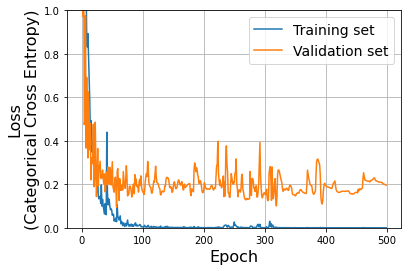

In [29]:
def plot_loss(hist, step=1):
    plt.figure()
    loss = hist.history['loss'][::step]
    plt.plot(loss, label='Training set')
    vloss = hist.history['val_loss'][::step]
    plt.plot(vloss, label='Validation set')
    plt.xlabel('Epoch', size=16)
    plt.ylabel('Loss\n(Categorical Cross Entropy)', size=16)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.ylim(0,1)
    
plot_loss(hist)

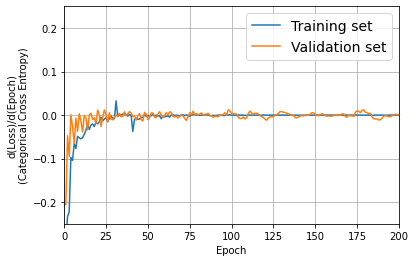

In [31]:
def plot_loss_deriv(hist, step=1):
    plt.figure()
    loss = np.array(hist.history['loss'])
    d_loss = (loss[step:]-loss[:-step])/step
    plt.plot(d_loss, label='Training set')
    vloss = np.array(hist.history['val_loss'])
    d_vloss = (vloss[step:]-vloss[:-step])/step
    plt.plot(d_vloss, label='Validation set')
    plt.xlabel('Epoch')
    plt.ylabel('d(Loss)/d(Epoch)\n(Categorical Cross Entropy)')
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.ylim(-0.25,0.25)
    plt.xlim(0, 200)
    
plot_loss_deriv(hist, 10)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([[2.08109498e-07, 9.99999046e-01, 6.72284330e-07],
       [1.47977031e-09, 1.00000000e+00, 4.07301659e-09],
       [9.29283215e-06, 9.99990702e-01, 2.45685317e-09],
       [2.87966657e-07, 2.85479557e-10, 9.99999762e-01],
       [1.71806527e-11, 2.35427482e-13, 1.00000000e+00],
       [8.16127332e-10, 3.69610942e-09, 1.00000000e+00],
       [5.11659812e-12, 1.00000000e+00, 6.05954342e-10],
       [7.50522773e-08, 9.99999881e-01, 4.24087041e-08],
       [3.88301487e-06, 9.18316534e-09, 9.99996066e-01],
       [6.34086609e-01, 3.65806431e-01, 1.07023181e-04],
       [4.32169742e-07, 1.27906760e-05, 9.99986768e-01],
       [2.82127152e-11, 1.68176150e-12, 1.00000000e+00],
       [3.30606764e-10, 9.25465260e-11, 1.00000000e+00],
       [9.99941468e-01, 5.76555576e-05, 8.47287822e-07],
       [1.00000000e+00, 3.18766688e-17, 4.49822220e-28],
       [4.91552146e-11, 1.00000000e+00, 3.38234258e-08],
       [2.96170474e-04, 9.09471750e-01, 9.02321041e-02],
       [1.74085125e-01, 8.25895

In [9]:
y_test_arg = np.argmax(y_test, axis=1)
y_pred_arg = np.argmax(y_pred, axis=1)
print('Recycle (0) vs. Trash (1) vs. Compost (2)\nAlexNet  on New House data')
print('\nConfusion matrix:\n', confusion_matrix(y_test_arg, y_pred_arg))
print('\nAccuracy:', accuracy(y_test_arg, y_pred_arg))

Recycle (0) vs. Trash (1) vs. Compost (2)
AlexNet  on New House data

Confusion matrix:
 [[19  1  1]
 [ 0 25  1]
 [ 0  0 23]]

Accuracy: 0.9571428571428572


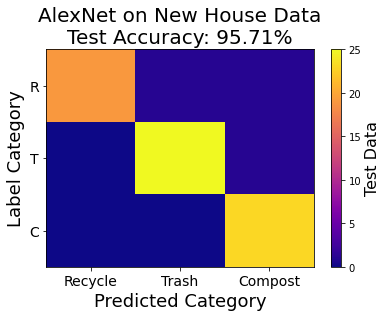

In [10]:
plt.pcolormesh(confusion_matrix(y_test_arg, y_pred_arg), cmap='plasma')
acc = np.round(accuracy(y_test_arg, y_pred_arg)*100, 2)
plt.title(f'AlexNet on New House Data\nTest Accuracy: {acc}%', size=20)
plt.xlabel('Predicted Category', size=18)
plt.ylabel('Label Category', size=18)
plt.xticks([0.5, 1.5, 2.5], ['Recycle', 'Trash', 'Compost'], size=14)
plt.yticks([0.5, 1.5, 2.5], ['R', 'T', 'C'], size=14)
plt.ylim(3,0)
plt.colorbar().set_label(label='Test Data', size=16)

In [11]:
# np.save(f'X_train_split{SPLIT}', X_train)
# np.save(f'y_train_split{SPLIT}', y_train)
# np.save(f'X_test_split{SPLIT}', X_test)
# np.save(f'y_test_split{SPLIT}', y_test)
# with open(f'test_idx_split{SPLIT}.txt', 'w') as f:
#     f.write(str(list(test_idx)))
# print('split saved')

In [12]:
model_name = f'AlexNet_model_split{SPLIT}'
model_json = model.to_json()
with open(f'{model_name}.json', 'w') as jf:
    jf.write(model_json)
model.save_weights(f'{model_name}.h5')

In [13]:
# from tensorflow.keras.models import model_from_json
with open(f'{model_name}.json') as jf:
    json = jf.read()
loaded_model = model_from_json(json)
loaded_model.load_weights(f'{model_name}.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 126, 96)       34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 62, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 58, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 28, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 26, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 24, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 22, 256)       8